In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
dau_df = pd.read_csv("R/section4-dau.csv", parse_dates=['log_date'])
dau_df.head()

,log_date,app_name,user_id
0,2013-08-01,game-01,33754
1,2013-08-01,game-01,28598
2,2013-08-01,game-01,30306
3,2013-08-01,game-01,117
4,2013-08-01,game-01,6605


In [12]:
user_info_df = pd.read_csv("R/section4-user_info.csv")
user_info_df.head()

,install_date,app_name,user_id,gender,generation,device_type
0,2013-04-15,game-01,1,M,40,iOS
1,2013-04-15,game-01,2,M,10,Android
2,2013-04-15,game-01,3,F,40,iOS
3,2013-04-15,game-01,4,M,10,Android
4,2013-04-15,game-01,5,M,40,iOS


In [13]:
user_info_dau = pd.merge(user_info_df, dau_df, on=['app_name', 'user_id'])
user_info_dau

,install_date,app_name,user_id,gender,generation,device_type,log_date
0,2013-04-15,game-01,1,M,40,iOS,2013-09-01
1,2013-04-15,game-01,1,M,40,iOS,2013-09-02
2,2013-04-15,game-01,1,M,40,iOS,2013-09-03
3,2013-04-15,game-01,1,M,40,iOS,2013-09-04
4,2013-04-15,game-01,1,M,40,iOS,2013-09-05
5,2013-04-15,game-01,1,M,40,iOS,2013-09-06
6,2013-04-15,game-01,1,M,40,iOS,2013-09-07
7,2013-04-15,game-01,1,M,40,iOS,2013-09-08
8,2013-04-15,game-01,1,M,40,iOS,2013-09-09
9,2013-04-15,game-01,1,M,40,iOS,2013-09-10


In [14]:
user_info_dau['log_month'] = user_info_dau['log_date'].apply(lambda x: str(x)[0:7])
user_info_dau.head()

,install_date,app_name,user_id,gender,generation,device_type,log_date,log_month
0,2013-04-15,game-01,1,M,40,iOS,2013-09-01,2013-09
1,2013-04-15,game-01,1,M,40,iOS,2013-09-02,2013-09
2,2013-04-15,game-01,1,M,40,iOS,2013-09-03,2013-09
3,2013-04-15,game-01,1,M,40,iOS,2013-09-04,2013-09
4,2013-04-15,game-01,1,M,40,iOS,2013-09-05,2013-09


In [19]:
pd.pivot_table(user_info_dau, index=['log_month'], columns=['gender'], values='user_id', aggfunc='count')

gender,F,M
log_month,,
2013-08,47343,46842
2013-09,38027,38148


In [20]:
user_info_dau.pivot_table(index='log_month', columns='generation', values='user_id', aggfunc='count')

generation,10,20,30,40,50
log_month,,,,,
2013-08,18785,33671,28072,8828,4829
2013-09,15391,27229,22226,7494,3835


In [21]:
user_info_dau.pivot_table(index='log_month', columns=['gender', 'generation'], values='user_id', aggfunc='count')

gender         F                               M                          
generation    10     20     30    40    50    10     20     30    40    50
log_month                                                                 
2013-08     9091  17181  14217  4597  2257  9694  16490  13855  4231  2572
2013-09     7316  13616  11458  3856  1781  8075  13613  10768  3638  2054

In [22]:
user_info_dau.pivot_table(index='log_month', columns='device_type', values='user_id', aggfunc='count')

device_type,Android,iOS
log_month,,
2013-08,46974,47211
2013-09,29647,46528


device_type
Android    AxesSubplot(0.125,0.125;0.775x0.755)
iOS        AxesSubplot(0.125,0.125;0.775x0.755)
Name: app_name, dtype: object

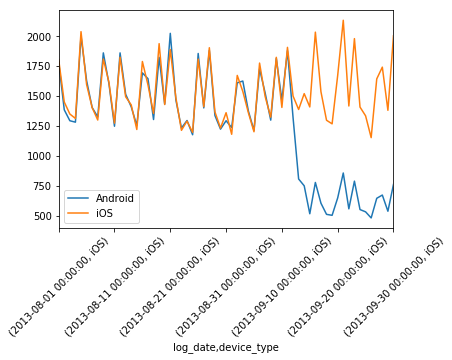

In [26]:
user_info_dau.groupby(['log_date', 'device_type'])['app_name'].count().groupby('device_type').plot(legend=True,rot=45)